## Wine Project - Part B

## Questions:

1.Suppose the population mean ofthe variable “density”is μ, do the following inferences: 
a.Provide an estimate of μbased on the sample;
b.Use the Central Limit Theorem (CLT) to quantify thevariabilityof your estimate;
c.Use the CLT to give a 95% confidence interval for μ.
d.Use the bootstrap method to do parts b and c, and compare the results with those obtained from theCLT. State your findings. e.Can we use a normal distribution to model “density”? If yes, what are the maximum likelihood estimates of the mean and standard deviation? Please provide their standard errors as well. 

Notes: 1a. The population includesall the red wines produced in the north of Portugal. The sample is these 1599 bottles of red winestested. We use “the sample” (1599 rows of data) to make inference about the population mean parameter mu.1e. To find the MLEs, you may consider multiplying the data by 10. This will solve anumerical problem you mayencounter. You musttransform back in the end.

2 Suppose the population mean of the variable “residual sugar” is μ, answer the following questions. 
a.Provide an estimate of μ based on the sample;
b.Noting that the sample distribution of “residual sugar” is highly skewed, can we use the CLT to quantify the variability of your estimate? Can we use the CLT to give a 95% confidence interval for μ? If yes, please give your solution.If no, explain why. c.Use the bootstrap method to do part b. Is the bootstrap confidence interval symmetric?  (hint: check the bootstrap distribution; see p. 43in Lecture 3).
d.Can we use a normal distribution to model “residual sugar”? If no, what distribution do you think can approximate its empirical distribution? What parameters are needed to characterize such a distribution? what are their maximum likelihood estimates? Please provide their standard errors as well.

3.
We classify those winesas “excellent” if their rating is at least 7. Suppose the population proportion of excellent wines is p. Do the following:
a.Use the CLT to derive a 95% confidence intervalfor p;
b.Use the bootstrap method to derive a 95% confidence intervalfor p;
c.Compare the two intervals. Is there any difference worth our attention?
d.What is the maximum likelihood estimate of p and its standard error?

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy.optimize as opt

winequality_red = pd.read_csv('winequality-red.csv', sep=';')
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Suppose the population mean of the variable “density” is μ
**1(a) Provide an estimate of μ based on the sample**

Ans: estimate of μ is 0.99674

In [2]:
density_mean = winequality_red['density'].mean()

0.9967466791744831

**b. Use the Central Limit Theorem (CLT) to quantify the variability of your estimate**

Ans: Variability is explained by the standard error, which is 4.719810055780343e-05

In [6]:
std_error = winequality_red['density'].std()/(np.sqrt(len(winequality_red['density'])))


4.719810055780343e-05

**c. Use the CLT to give a 95% confidence interval for μ.**

Ans:
Mean is 0.99674

Confidence interval is (0.99665, 0.99683)

In [11]:
def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
confidence_interval(winequality_red['density'])

(0.9967466791744841, 0.996654102478286, 0.9968392558706822)

In [8]:
st.norm.interval(alpha=0.95, loc=np.mean(winequality_red['density']), scale=st.sem(winequality_red['density']))

(0.9966541725972511, 0.9968391857517152)

**d.Use the bootstrap method to do parts b and c, and compare the results with those obtained from the CLT. State your findings.**

Ans: The distribution seems normal, and this is exactly what we were expecting, because of the Central Limit Theorem when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

Comparing bootstrapped results with CLT

Standard error after bootstrapping - 4.727218958015202e-07

Standard error with CLT - 4.719810055780343e-05

Bootstrap CI - (0.99665442, 0.99683981)

CLT CI - (0.99665, 0.99683)

Standard error after bootstrapping is better because we have resampled thousands of times and the estimates are more representative of the population. Also, as shown in the distribution below, the bootstrap confidence interval is symmetric

In [44]:
sample_mean = []
for _ in range(10000):
    sample_n = np.random.choice(winequality_red['density'],size=len(winequality_red['density']))
    sample_mean.append(sample_n.mean())


<AxesSubplot:ylabel='Count'>

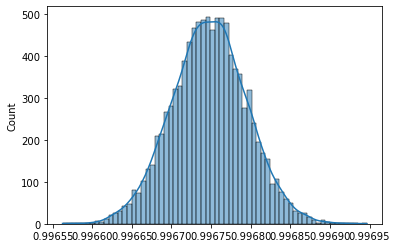

In [45]:
sns.histplot(sample_mean, kde=True)

In [19]:
sample_std_error = np.array(sample_mean).std()/(np.sqrt(len(sample_mean)))
sample_std_error

4.727218958015202e-07

In [20]:
conf_interval = np.percentile(sample_mean,[2.5,97.5])

conf_interval

array([0.99665442, 0.99683981])

#### e. Can we use a normal distribution to model “density”? If yes, what are the maximum likelihood estimates of the mean and standard deviation? Please provide their standard errors as well.

Ans: Yes, normal distribution can be used to model density. Its clear from the above histogram
The function MLE for the original “density” values is not stable because the values are too small. To accommodate these values, multiply the variable “density” by ten to flatten the curve. Once the estimates and standard errors are calculated, divide those values by ten to achieve the accurate values.

Maximum likelihood estimators
mu_MLE= 0.9967  , sig_MLE= 0.01886

Standard error as per MLE is 0.0004718

In [90]:
Data = winequality_red['density']*10

print('mean Data (check)= ', winequality_red['density'].mean(), 'std dev. Data (check) = ',  winequality_red['density'].std())

# function that generates probabilities
def norm_pdf(xvals, mu, sigma):
    pdf_vals = ((1 / (sigma * np.sqrt(2 * np.pi)) *
                 np.exp(- (xvals - mu) ** 2 / (2 * sigma ** 2)))) # normal pdf distribution
    return pdf_vals

def log_lik_norm(xvals, mu, sigma):
    # Generates values from a normal distributed pdf
    pdf_vals = norm_pdf(xvals, mu, sigma)
    # Take log of normal distributed pdf values  
    # Take log of normal distributed pdf values
    ln_pdf_vals = np.log(pdf_vals)  
    # Summation of normal distributed pdf values (= loglikelihood)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args): # Provides the negative log-likelihood
    # Parameters
    mu, sigma = params
    # Arguments
    xvals = args
    # Log-likelihood
    log_lik_val = log_lik_norm(xvals, mu, sigma)
    # Maximizing -> NOTE: Minimizing is computationally more stable
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

mu_init = 3
sig_init = 1 # initalization is sensitive for 'L-BFGS-B' -> first guess: method='SLSQP'
params_init = np.array([mu_init, sig_init])
# Arguments
mle_args = (Data)
# Minimizing procedure (constrained)
results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='SLSQP',
                            bounds=((None, None), (1e-10, None)))

# Maximum Likelihood Estimators
mu_MLE, sig_MLE = results_cstr.x

print('mu_MLE=', mu_MLE/10, ' sig_MLE=', sig_MLE)


mean Data (check)=  0.9967466791744831 std dev. Data (check) =  0.0018873339538425559
mu_MLE= 0.996746640459573  sig_MLE= 0.018867382540109508


<ipython-input-90-1995ad606f71>:16: RuntimeWarning: divide by zero encountered in log
  ln_pdf_vals = np.log(pdf_vals)
C:\Users\Karthik\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [92]:
sample1_std_error = sig_MLE/(np.sqrt(len(winequality_red['density'])))
sample1_std_error

0.0004718320340592571

#### 2.Suppose the population mean of the variable “residual sugar” is μ, answer the following questions.**
**a.Provide an estimate of μ based on the sample**

Ans: estimate of μ is 2.53880

In [22]:
residualsugar_mean = winequality_red['residual sugar'].mean()
residualsugar_mean

2.5388055034396517

#### b. Noting that the sample distribution of “residual sugar” is highly skewed, can we use the CLT to quantify the variability of your estimate? Can we use the CLT to give a 95% confidence interval for μ? If yes, please give your solution.If no, explain why.

Ans: Yes, we can use CLT to quantify the variaility of the estimate as long as we have a large enough sample size. The means will be normally distributed even though the sample is right skewed.

Standard error in this case is 0.035259

95% Confidence interval is (2.4696, 2.6079)

In [25]:
std_error1 = winequality_red['residual sugar'].std()/(np.sqrt(len(winequality_red['residual sugar'])))
std_error1

0.03525922171664837

In [26]:
st.norm.interval(alpha=0.95, loc=np.mean(winequality_red['residual sugar']), scale=st.sem(winequality_red['residual sugar']))

(2.4696986987521083, 2.607912308127195)

#### c. Use the bootstrap method to do part b. Is the bootstrap confidence interval symmetric?  (hint: check the bootstrap distribution; see p. 43in Lecture 3).

Ans: 

Comparing bootstrapped results with CLT

Standard error after bootstrapping - 0.0003482

Standard error with CLT - 0.035259

Bootstrap CI - (2.47325907, 2.60938399)

CLT CI - (2.46969, 2.60791)

Standard error after bootstrapping is better because we have resampled thousands of times and the estimates are more representative of the population.
Also, as shown in the distribution below, the bootstrap confidence interval is symmetric


In [41]:
sample_mean1 = []
for _ in range(10000):
    sample_n = np.random.choice(winequality_red['residual sugar'],size=len(winequality_red['residual sugar']))
    sample_mean1.append(sample_n.mean())

<AxesSubplot:ylabel='Count'>

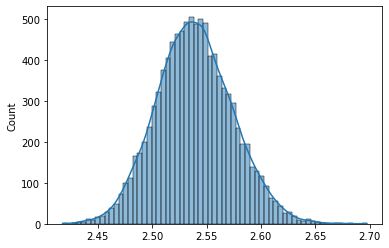

In [43]:
sns.histplot(sample_mean1, kde=True)

In [46]:
conf_interval_sample = np.percentile(sample_mean1,[2.5,97.5])

conf_interval_sample

array([2.47325907, 2.60938399])

In [47]:
sample1_std_error = np.array(sample_mean1).std()/(np.sqrt(len(sample_mean1)))
sample1_std_error

0.000348267212288569

#### d. Can we use a normal distribution to model “residual sugar”? If no, what distribution do you think can approximate its empirical distribution? What parameters are needed to characterize such a distribution? what are their maximum likelihood estimates? Please provide their standard errors as well.

Ans: No, we cannot use a normal distribution to model “residual sugar”. The histogram of residual sugar is heavily skewed to the right. With that said, a lognormal distribution can be used to approximate empirical distribution.
Parameters required are mean log and standard deviation log

Maximum likelihood estimators mu_MLE= 2.53880  , sig_MLE= 1.40948

standard error as per MLE is 0.035259

In [89]:
Data = winequality_red['residual sugar']

print('mean Data (check)= ', Data.mean(), 'std dev. Data (check) = ',  Data.std())

# function that generates probabilities
def norm_pdf(xvals, mu, sigma):
    pdf_vals = ((1 / (sigma * np.sqrt(2 * np.pi)) *
                 np.exp(- (xvals - mu) ** 2 / (2 * sigma ** 2)))) # normal pdf distribution
    return pdf_vals

def log_lik_norm(xvals, mu, sigma):
    # Generates values from a normal distributed pdf
    pdf_vals = norm_pdf(xvals, mu, sigma)
    # Take log of normal distributed pdf values  
    # Take log of normal distributed pdf values
    ln_pdf_vals = np.log(pdf_vals)  
    # Summation of normal distributed pdf values (= loglikelihood)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args): # Provides the negative log-likelihood
    # Parameters
    mu, sigma = params
    # Arguments
    xvals = args
    # Log-likelihood
    log_lik_val = log_lik_norm(xvals, mu, sigma)
    # Maximizing -> NOTE: Minimizing is computationally more stable
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

mu_init = 3
sig_init = 1 # initalization is sensitive for 'L-BFGS-B' -> first guess: method='SLSQP'
params_init = np.array([mu_init, sig_init])
# Arguments
mle_args = (Data)
# Minimizing procedure (constrained)
results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='SLSQP',
                            bounds=((None, None), (1e-10, None)))

# Maximum Likelihood Estimators
mu_MLE, sig_MLE = results_cstr.x

print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

sample2_std_error = sig_MLE/(np.sqrt(len(winequality_red['residual sugar'])))
sample2_std_error

mean Data (check)=  2.5388055034396517 std dev. Data (check) =  1.4099280595072805
mu_MLE= 2.5388054889615996  sig_MLE= 1.4094871365224748


<ipython-input-89-77d1e210d6c1>:16: RuntimeWarning: divide by zero encountered in log
  ln_pdf_vals = np.log(pdf_vals)


0.03524819519570186

#### 3. We classify those wines as “excellent” if their rating is at least 7. Suppose the population proportion of excellent wines is p. Do the following:
**a.Use the CLT to derive a 95% confidence interval for p**

Ans: Confidence interval is (0.11891, 0.15250)

In [86]:
winequality_red['class'] = winequality_red['quality'].apply(lambda x: 1 if x>=7 else 0)


In [81]:

st.norm.interval(alpha=0.95, loc=np.mean(winequality_red['class']), scale=st.sem(winequality_red['class']))

(0.11891810078622822, 0.1525015364870676)

#### b.Use the bootstrap method to derive a 95% confidence interval for p

Ans: Confidence interval after bootstrapping is (0.11944966, 0.15259537)

In [82]:
sample_mean2 = []
for _ in range(10000):
    sample_n = np.random.choice(winequality_red['class'],size=len(winequality_red['class']))
    sample_mean2.append(sample_n.mean())
    
conf_interval_sample2 = np.percentile(sample_mean2,[2.5,97.5])

conf_interval_sample2

array([0.11944966, 0.15259537])

<AxesSubplot:ylabel='Count'>

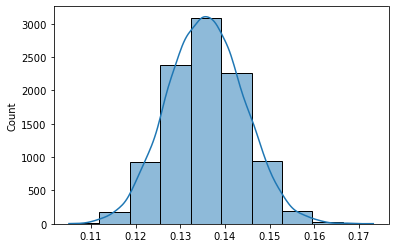

In [85]:
sns.histplot(sample_mean2, bins=10, kde=True)

#### c. Compare the two intervals. Is there any difference worth our attention?  

Ans: 
Using CLT, confidence interval (0.11891, 0.15250)

Using bootstrap, confidence interval (0.11944966, 0.15259537)

There is no significant difference worth our attention

#### d.What is the maximum likelihood estimate of p and its standard error?

Ans: Maximum likelihood estimate mu_MLE= 0.13571 , sig_MLE= 0.34247

standard error of MLE is 0.008564

In [87]:
Data = winequality_red['class']

print('mean Data (check)= ', Data.mean(), 'std dev. Data (check) = ',  Data.std())

# function that generates probabilities
def norm_pdf(xvals, mu, sigma):
    pdf_vals = ((1 / (sigma * np.sqrt(2 * np.pi)) *
                 np.exp(- (xvals - mu) ** 2 / (2 * sigma ** 2)))) # normal pdf distribution
    return pdf_vals

def log_lik_norm(xvals, mu, sigma):
    # Generates values from a normal distributed pdf
    pdf_vals = norm_pdf(xvals, mu, sigma)
    # Take log of normal distributed pdf values  
    # Take log of normal distributed pdf values
    ln_pdf_vals = np.log(pdf_vals)  
    # Summation of normal distributed pdf values (= loglikelihood)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args): # Provides the negative log-likelihood
    # Parameters
    mu, sigma = params
    # Arguments
    xvals = args
    # Log-likelihood
    log_lik_val = log_lik_norm(xvals, mu, sigma)
    # Maximizing -> NOTE: Minimizing is computationally more stable
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

mu_init = 3
sig_init = 1 # initalization is sensitive for 'L-BFGS-B' -> first guess: method='SLSQP'
params_init = np.array([mu_init, sig_init])
# Arguments
mle_args = (Data)
# Minimizing procedure (constrained)
results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='SLSQP',
                            bounds=((None, None), (1e-10, None)))

# Maximum Likelihood Estimators
mu_MLE, sig_MLE = results_cstr.x

print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mean Data (check)=  0.1357098186366479 std dev. Data (check) =  0.3425873077431279
mu_MLE= 0.1357112905433224  sig_MLE= 0.3424794744067952


<ipython-input-87-d91ab4e077e2>:16: RuntimeWarning: divide by zero encountered in log
  ln_pdf_vals = np.log(pdf_vals)


In [88]:
sample3_std_error = sig_MLE/(np.sqrt(len(winequality_red['class'])))
sample3_std_error

0.008564663735914562